In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

1. โหลด csv เข้าไปใน Python Pandas

In [2]:
df = pd.read_csv("Prostate_Cancer.csv", index_col="id")

2. เขียนโค้ดแสดง หัว10แถว ท้าย10แถว และสุ่ม10แถว

In [3]:
df.head(10)

,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
id,,,,,,,,,
1,M,23,12,151,954,0.143,0.278,0.242,0.079
2,B,9,13,133,1326,0.143,0.079,0.181,0.057
3,M,21,27,130,1203,0.125,0.160,0.207,0.060
4,M,14,16,78,386,0.070,0.284,0.260,0.097
5,M,9,19,135,1297,0.141,0.133,0.181,0.059
6,B,25,25,83,477,0.128,0.170,0.209,0.076
7,M,16,26,120,1040,0.095,0.109,0.179,0.057
8,M,15,18,90,578,0.119,0.165,0.220,0.075
9,M,19,24,88,520,0.127,0.193,0.235,0.074


In [4]:
df.tail(10)

,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
id,,,,,,,,,
91,B,23,27,95,663,0.090,0.086,0.169,0.059
92,M,10,12,100,728,0.092,0.104,0.172,0.061
93,B,14,14,85,552,0.074,0.051,0.139,0.053
94,B,10,17,87,555,0.102,0.082,0.164,0.057
95,M,22,26,100,706,0.104,0.155,0.186,0.063
96,M,23,16,132,1264,0.091,0.131,0.210,0.056
97,B,22,14,78,451,0.105,0.071,0.190,0.066
98,B,19,27,62,295,0.102,0.053,0.135,0.069
99,B,21,24,74,413,0.090,0.075,0.162,0.066


3. เช็คว่ามีข้อมูลที่หายไปไหม สามารถจัดการได้ตามความเหมาะสม


In [5]:
df.isna().sum()

diagnosis_result     0
radius               0
texture              0
perimeter            0
area                 0
smoothness           0
compactness          0
symmetry             0
fractal_dimension    0
dtype: int64

4. ใช้ info และ describe อธิบายข้อมูลเบื้องต้น


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 1 to 100
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   diagnosis_result   100 non-null    object 
 1   radius             100 non-null    int64  
 2   texture            100 non-null    int64  
 3   perimeter          100 non-null    int64  
 4   area               100 non-null    int64  
 5   smoothness         100 non-null    float64
 6   compactness        100 non-null    float64
 7   symmetry           100 non-null    float64
 8   fractal_dimension  100 non-null    float64
dtypes: float64(4), int64(4), object(1)
memory usage: 7.8+ KB


In [7]:
classification = {'B' : 0, 'M' : 1}
df['diagnosis_result'] = df['diagnosis_result'].map(classification)

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
diagnosis_result,100.0,0.62000,0.487832,0.000,0.0000,1.0000,1.000,1.000
radius,100.0,16.85000,4.879094,9.000,12.0000,17.0000,21.000,25.000
texture,100.0,18.23000,5.192954,11.000,14.0000,17.5000,22.250,27.000
perimeter,100.0,96.78000,23.676089,52.000,82.5000,94.0000,114.250,172.000
area,100.0,702.88000,319.710895,202.000,476.7500,644.0000,917.000,1878.000
smoothness,100.0,0.10273,0.014642,0.070,0.0935,0.1020,0.112,0.143
compactness,100.0,0.12670,0.061144,0.038,0.0805,0.1185,0.157,0.345
symmetry,100.0,0.19317,0.030785,0.135,0.1720,0.1900,0.209,0.304
fractal_dimension,100.0,0.06469,0.008151,0.053,0.0590,0.0630,0.069,0.097


5. ใช้ pairplot ดูความสัมพันธ์เบื้องต้นของ features ที่สนใจ

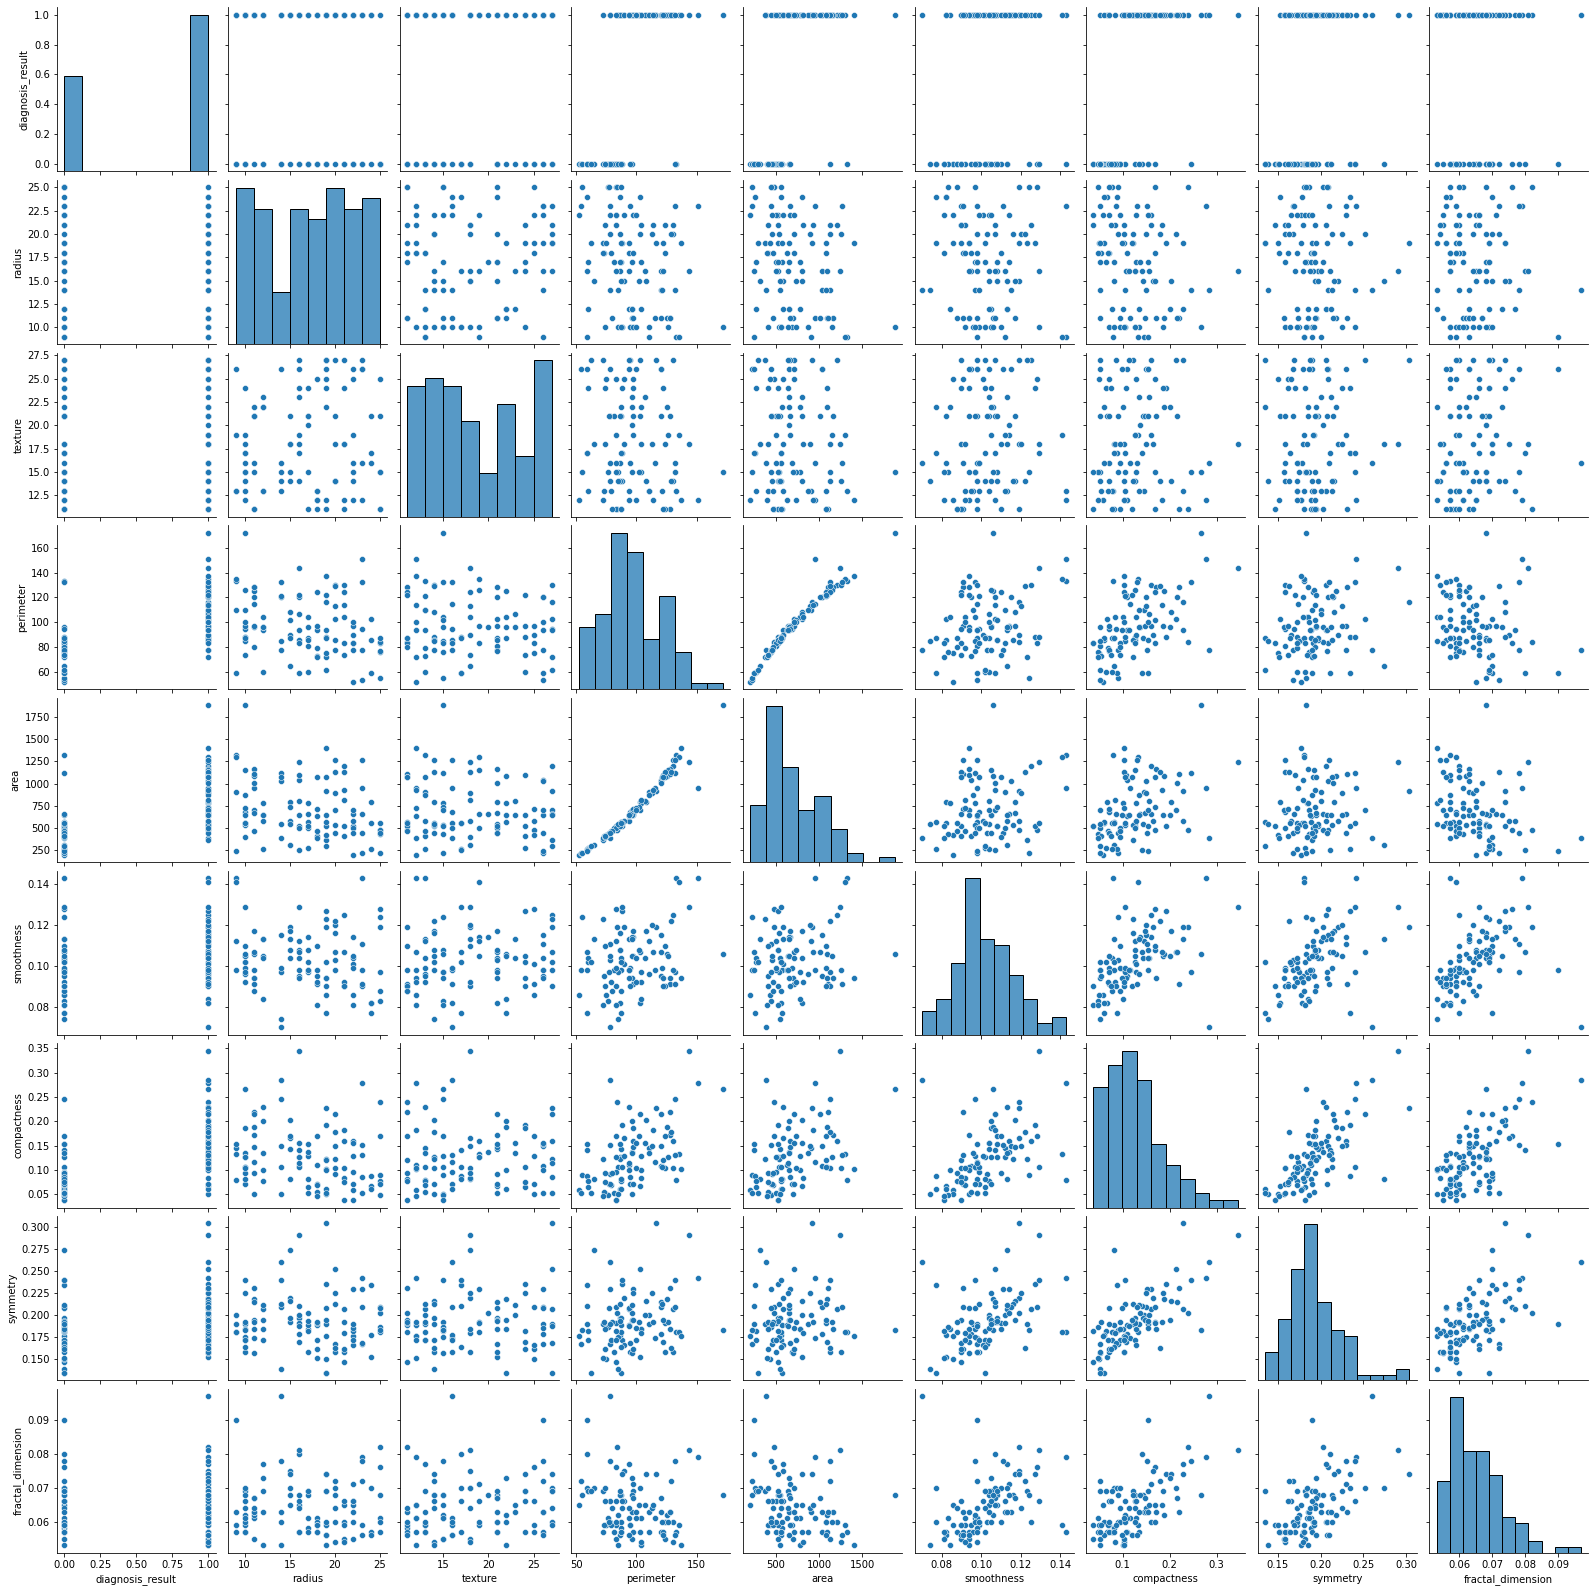

In [9]:
sns.pairplot(df);

6. ใช้ displot เพื่อดูการกระจายของแต่ละคอลัมน์


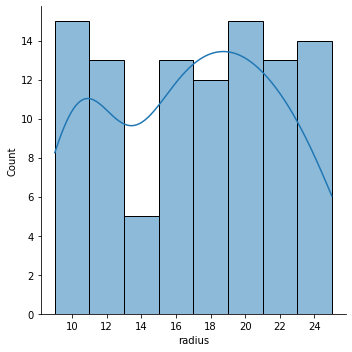

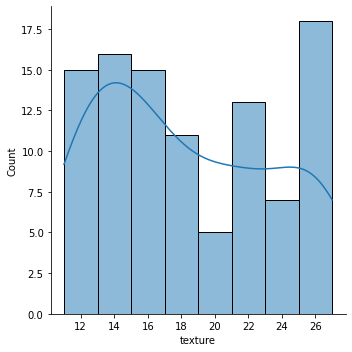

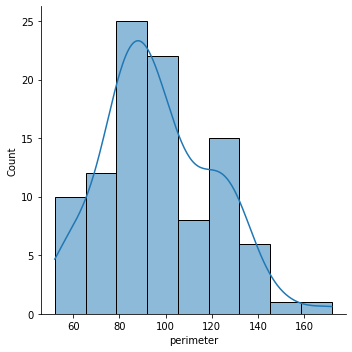

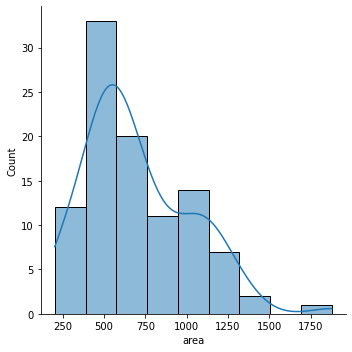

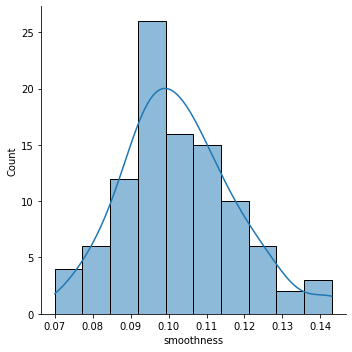

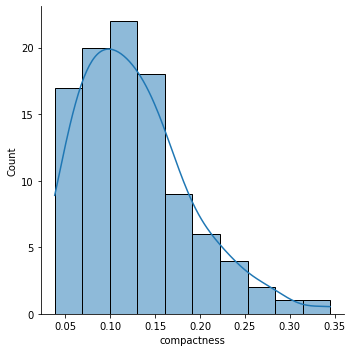

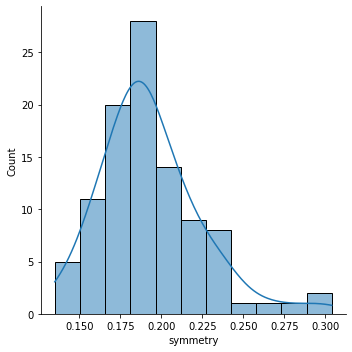

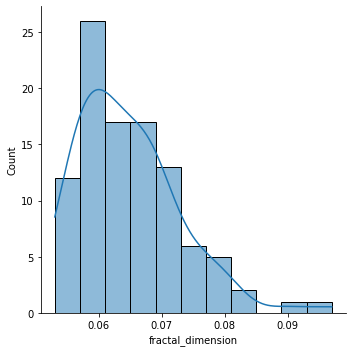

In [10]:
for i in df.drop(['diagnosis_result'], axis=1).columns:
    sns.displot(df[i], kde=True);

7. ใช้ heatmap ดูความสัมพันธ์ของคอลัมน์ที่สนใจ

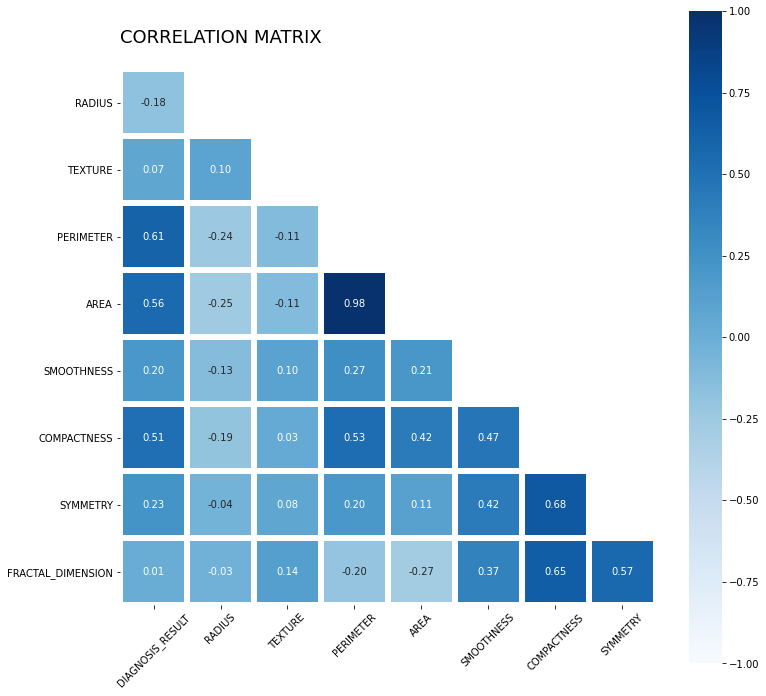

In [11]:
df_corr = df.corr()
fig, ax = plt.subplots(figsize=(12, 15))

# mask
mask = np.triu(np.ones_like(df_corr, dtype=np.bool))

# adjust mask and df
mask = mask[1:, :-1]
corr = df_corr.iloc[1:,:-1].copy()

# plot heatmap
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", 
           linewidths=5, cmap='Blues', vmin=-1, vmax=1, 
           cbar_kws={"shrink": .8}, square=True)

# ticks
yticks = [i.upper() for i in corr.index]
xticks = [i.upper() for i in corr.columns]
plt.yticks(plt.yticks()[0], labels=yticks, rotation=0)
plt.xticks(plt.xticks()[0], labels=xticks, rotation=45)

# title
title = 'CORRELATION MATRIX \n'
plt.title(title, loc='left', fontsize=18)
plt.show()

8. สร้าง scatter plot ของความสัมพันธ์ที่มี Correlation สูงสุด

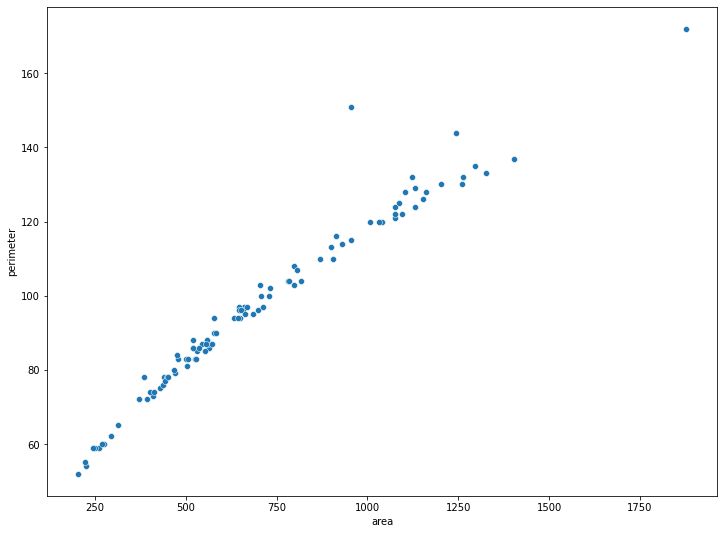

In [12]:
plt.figure(figsize=(12, 9))
sns.scatterplot(x=df["area"], y=df["perimeter"]);

9. สร้าง scatter plot ของความสัมพันธ์ที่มี Correlation ต่ำสุด

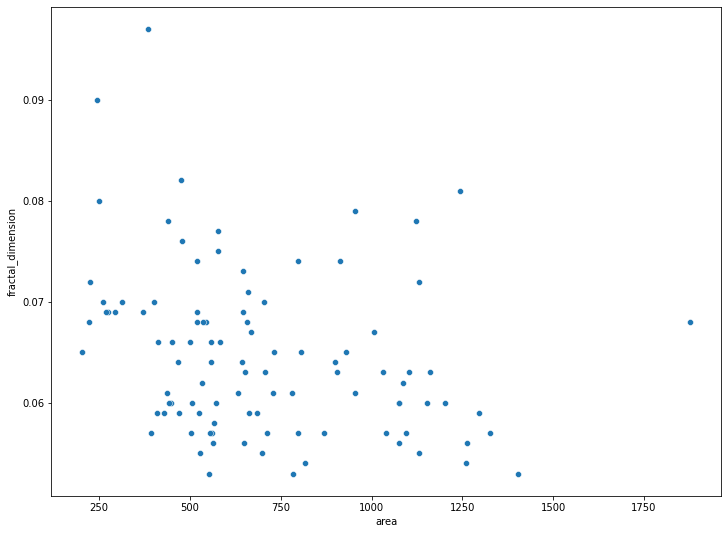

In [13]:
plt.figure(figsize=(12, 9))
sns.scatterplot(x=df["area"], y=df["fractal_dimension"]);

10. สร้าง histogram ของ feature ที่สนใจ


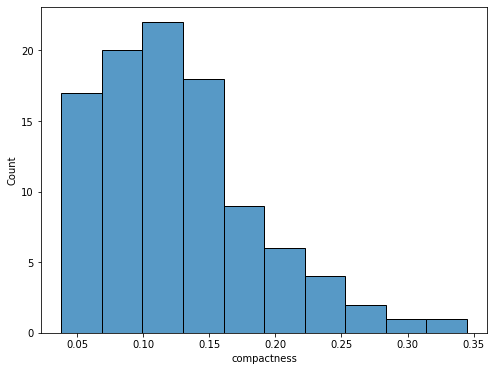

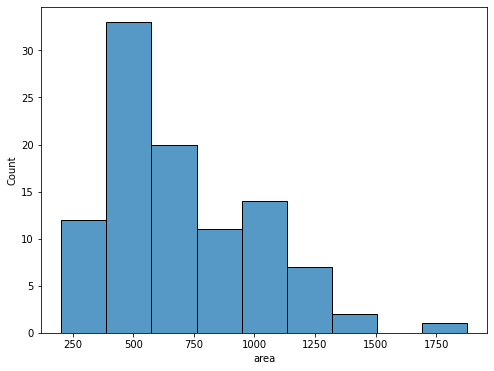

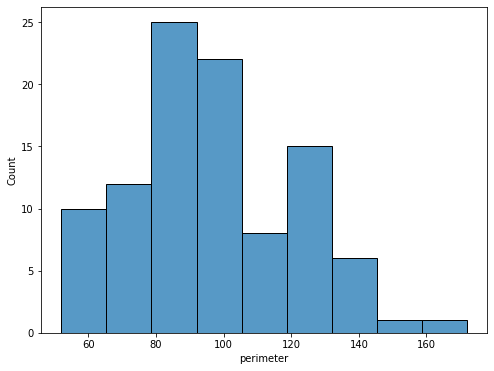

In [14]:
# compactness, area, perimeter
for i in ["compactness", "area", "perimeter"]:
    fig = plt.figure(figsize=(8,6))
    sns.histplot(df[i]);

11. สร้าง box plot ของ features ที่สนใจ


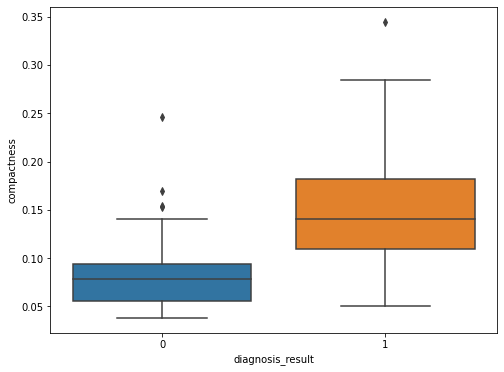

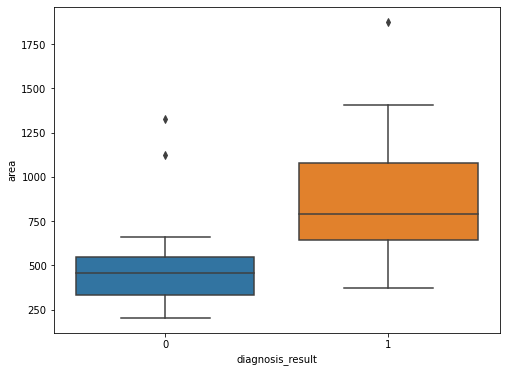

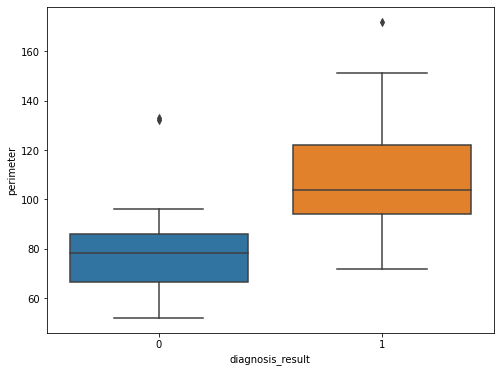

In [15]:
# compactness, area, perimeter
for i in ["compactness", "area", "perimeter"]:
    fig = plt.figure(figsize=(8,6))
    sns.boxplot(x=df["diagnosis_result"], y=df[i])

12. สร้าง train/test split ของข้อมูล สามารถลองทดสอบ 70:30, 80:20, 90:10 ratio ได้ตามใจ

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, df['diagnosis_result'], test_size=0.3, random_state=100)

13. ทำ Data Visualization อื่นๆ (แล้วแต่เลือก)


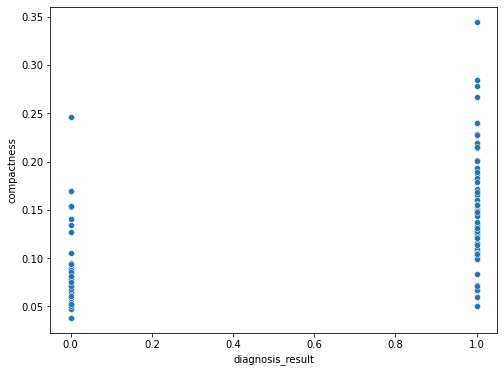

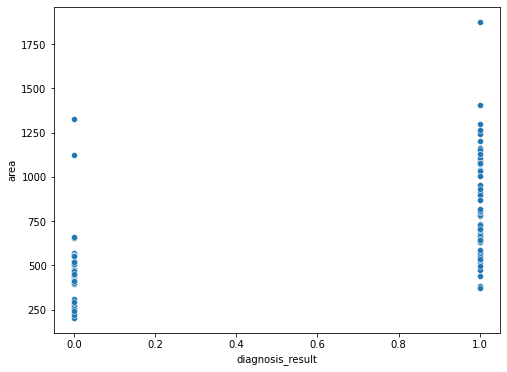

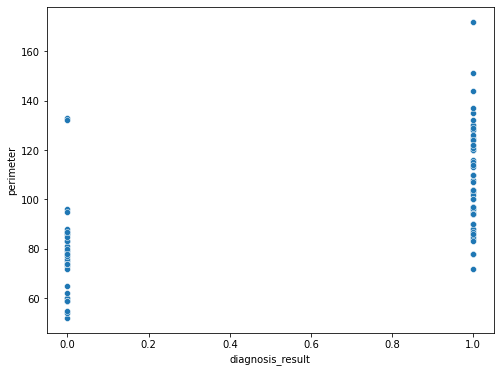

In [17]:
# compactness, area, perimeter
for i in ["compactness", "area", "perimeter"]:
    fig = plt.figure(figsize=(8,6))
    sns.scatterplot(x=df["diagnosis_result"], y=df[i])

14. พิจารณาว่าควรทำ Normalization หรือ Standardization หรือไม่ควรทั้งสองอย่าง พร้อมให้เหตุผล 

ans: ควรทำเฉพาะ Normalization เพราะว่า Data point ไม่ได้กระจายตัวแบบ normal dist

15. เลือกช้อยที่ดีที่สุดจากข้อ 14 (หรือจะทำทุกอันแล้วนำมาเปรียบเทียบก็ได้)


In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
min_max_scaler = MinMaxScaler()

In [22]:
df.head()

,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
id,,,,,,,,,
1,1,23,12,151,954,0.143,0.278,0.242,0.079
2,0,9,13,133,1326,0.143,0.079,0.181,0.057
3,1,21,27,130,1203,0.125,0.160,0.207,0.060
4,1,14,16,78,386,0.070,0.284,0.260,0.097
5,1,9,19,135,1297,0.141,0.133,0.181,0.059


In [24]:
feature = min_max_scaler.fit_transform(df.drop(columns=["diagnosis_result"]))

In [26]:
df.columns[2:]

Index(['texture', 'perimeter', 'area', 'smoothness', 'compactness', 'symmetry',
       'fractal_dimension'],
      dtype='object')

In [27]:
df_feature = pd.DataFrame(feature, columns=df.columns[1:])

In [28]:
df_feature

,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,0.8750,0.0625,0.825000,0.448687,1.000000,0.781759,0.633136,0.590909
1,0.0000,0.1250,0.675000,0.670644,1.000000,0.133550,0.272189,0.090909
2,0.7500,1.0000,0.650000,0.597255,0.753425,0.397394,0.426036,0.159091
3,0.3125,0.3125,0.216667,0.109785,0.000000,0.801303,0.739645,1.000000
4,0.0000,0.5000,0.691667,0.653341,0.972603,0.309446,0.272189,0.136364
...,...,...,...,...,...,...,...,...
95,0.8750,0.3125,0.666667,0.633652,0.287671,0.302932,0.443787,0.068182
96,0.8125,0.1875,0.216667,0.148568,0.479452,0.107492,0.325444,0.295455
97,0.6250,1.0000,0.083333,0.055489,0.438356,0.048860,0.000000,0.363636
98,0.7500,0.8125,0.183333,0.125895,0.273973,0.120521,0.159763,0.295455


In [100]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_feature, df['diagnosis_result'], test_size=0.3, random_state=100)

16. วัดผลโมเดล โดยใช้ confusion matrix และ ประเมินผลด้วยคะแนน Accuracy, F1 score, Recall, Precision

In [101]:
from sklearn.svm import SVC

In [102]:
svc = SVC()

In [103]:
svc.fit(X_train, y_train)

SVC()

In [104]:
predicted_default = svc.predict(X_test)

In [105]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score

In [106]:
confusion_matrix_ = confusion_matrix(y_test, predicted_default)

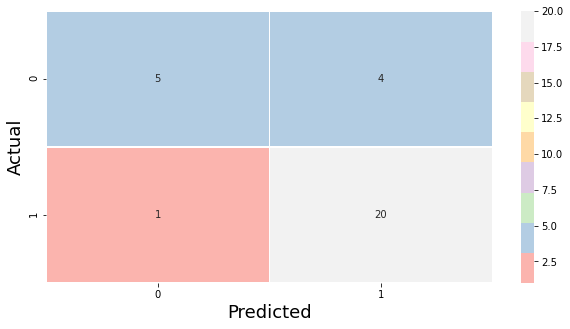

In [107]:
fig = plt.figure(figsize=(10, 5))
sns.heatmap(confusion_matrix_, annot=True, cmap="Pastel1", linewidths=0.5, linecolor="white");
plt.xlabel("Predicted", fontsize=18);
plt.ylabel("Actual", fontsize=18);

In [109]:
print(">> Score:")
print("--"*20)
print(f"   Accuracy = {accuracy_score(y_test, predicted_default)}")
print(f"   F1 Score = {f1_score(y_test, predicted_default)}")
print(f"   Precision = {precision_score(y_test, predicted_default)}")
print(f"   Recall = {recall_score(y_test, predicted_default)}")
print("--"*20)

>> Score:
----------------------------------------
   Accuracy = 0.8333333333333334
   F1 Score = 0.888888888888889
   Precision = 0.8333333333333334
   Recall = 0.9523809523809523
----------------------------------------


7. หาค่า parameter combination ที่ดีที่สุด สำหรับ Dataset นี้ โดยใช้ GridSearch (Hyperparameter Tuning)

In [110]:
from sklearn.model_selection import GridSearchCV

In [111]:
parameter = {"C": [0.01, 0.1, 1, 10, 100, 1000], "gamma": [0.01, 0.1, 1, 10, 100, 1000]}

In [112]:
grid_search = GridSearchCV(SVC(), parameter)
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000],
                         'gamma': [0.01, 0.1, 1, 10, 100, 1000]})

In [113]:
grid_search.best_params_

{'C': 1, 'gamma': 1}

In [68]:
grid_search.best_score_

0.8857142857142858

>> Score:
----------------------------------------
   Accuracy = 0.8666666666666667
   F1 Score = 0.909090909090909
   Precision = 0.8695652173913043
   Recall = 0.9523809523809523
----------------------------------------


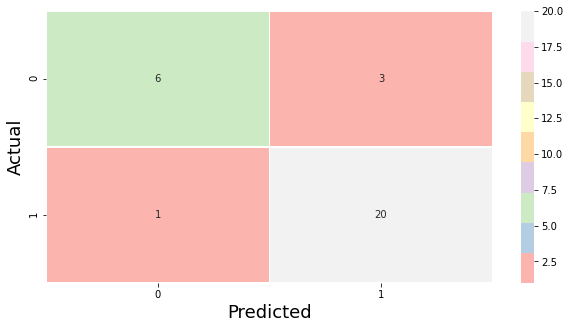

In [114]:
predicted_grid = grid_search.predict(X_test)
confusion_matrix_ = confusion_matrix(y_test, predicted_grid)
fig = plt.figure(figsize=(10, 5))
sns.heatmap(confusion_matrix_, annot=True, cmap="Pastel1", linewidths=0.5, linecolor="white");
plt.xlabel("Predicted", fontsize=18);
plt.ylabel("Actual", fontsize=18);
print(">> Score:")
print("--"*20)
print(f"   Accuracy = {accuracy_score(y_test, predicted_grid)}")
print(f"   F1 Score = {f1_score(y_test, predicted_grid)}")
print(f"   Precision = {precision_score(y_test, predicted_grid)}")
print(f"   Recall = {recall_score(y_test, predicted_grid)}")
print("--"*20)

18. เลือกเฉพาะ features ที่สนใจมาเทรนโมเดล และวัดผลเปรียบเทียบกับแบบ all-features

In [72]:
df.drop(columns=["diagnosis_result"]).head()

,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
id,,,,,,,,
1,23,12,151,954,0.143,0.278,0.242,0.079
2,9,13,133,1326,0.143,0.079,0.181,0.057
3,21,27,130,1203,0.125,0.160,0.207,0.060
4,14,16,78,386,0.070,0.284,0.260,0.097
5,9,19,135,1297,0.141,0.133,0.181,0.059


In [71]:
df_feature.head()

,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,0.8750,0.0625,0.825000,0.448687,1.000000,0.781759,0.633136,0.590909
1,0.0000,0.1250,0.675000,0.670644,1.000000,0.133550,0.272189,0.090909
2,0.7500,1.0000,0.650000,0.597255,0.753425,0.397394,0.426036,0.159091
3,0.3125,0.3125,0.216667,0.109785,0.000000,0.801303,0.739645,1.000000
4,0.0000,0.5000,0.691667,0.653341,0.972603,0.309446,0.272189,0.136364


In [115]:
feature = df[["compactness", "fractal_dimension", "smoothness", "symmetry"]]

In [116]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature, df['diagnosis_result'], test_size=0.3, random_state=100)

>> Score:
----------------------------------------
   Accuracy = 0.8
   F1 Score = 0.8571428571428571
   Precision = 0.8571428571428571
   Recall = 0.8571428571428571
----------------------------------------


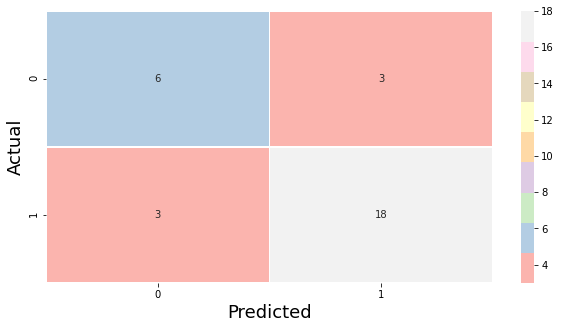

In [117]:
grid_search = GridSearchCV(SVC(), parameter)
grid_search.fit(X_train, y_train)
predicted_norm = grid_search.predict(X_test)
confusion_matrix_ = confusion_matrix(y_test, predicted_norm)
fig = plt.figure(figsize=(10, 5))
sns.heatmap(confusion_matrix_, annot=True, cmap="Pastel1", linewidths=0.5, linecolor="white");
plt.xlabel("Predicted", fontsize=18);
plt.ylabel("Actual", fontsize=18);
print(">> Score:")
print("--"*20)
print(f"   Accuracy = {accuracy_score(y_test, predicted_norm)}")
print(f"   F1 Score = {f1_score(y_test, predicted_norm)}")
print(f"   Precision = {precision_score(y_test, predicted_norm)}")
print(f"   Recall = {recall_score(y_test, predicted_norm)}")
print("--"*20)

19. ทำ Visualization ของค่า F1 Score ระหว่าง ผลลัพธ์ที่ได้จากค่า Default, ผลลัพธ์ที่ได้จากการใช้ Grid Search และ ผลลัพธ์ของ Normalization


In [124]:
value = {'F1 score' : [f1_score(y_test, predicted), f1_score(y_test, predicted_grid),f1_score(y_test, predicted_norm)],
         'Recall' : [recall_score(y_test, predicted), recall_score(y_test, predicted_grid), recall_score(y_test, predicted_norm)],
         'Accuracy' : [accuracy_score(y_test, predicted), accuracy_score(y_test, predicted_grid), accuracy_score(y_test, predicted_norm)]}

In [125]:
df_all = pd.DataFrame(value, index=['Default', 'Grid Search', 'Normalization'])
df_all

,F1 score,Recall,Accuracy
Default,0.857143,0.857143,0.800000
Grid Search,0.909091,0.952381,0.866667
Normalization,0.857143,0.857143,0.800000


20. ทำ Visualization ของค่า Recall ระหว่าง ผลลัพธ์ที่ได้จากค่า Default, ผลลัพธ์ที่ได้จากการใช้ Grid Search และ ผลลัพธ์ของ Normalization


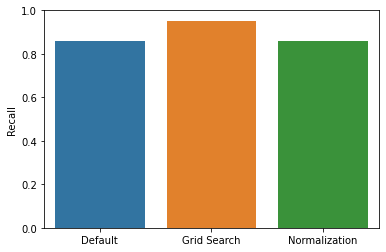

In [129]:
sns.barplot(x=df_all.index, y=df_all["Recall"]);

21. ทำ Visualization ของค่า Accuracy ระหว่าง ผลลัพธ์ที่ได้จากค่า Default, ผลลัพธ์ที่ได้จากการใช้ Grid Search และ ผลลัพธ์ของ Normalization

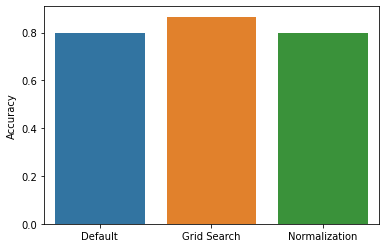

In [130]:
sns.barplot(x=df_all.index, y=df_all["Accuracy"]);

22. สามารถใช้เทคนิคใดก็ได้ตามที่สอนมา ใช้ SVM Algorithm แล้วให้ผลลัพธ์ที่ดีที่สุดที่เป็นไปได้ (อาจจะรวม Grid Search กับ Normalization ?)

In [136]:
df_feature.head()

,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,0.8750,0.0625,0.825000,0.448687,1.000000,0.781759,0.633136,0.590909
1,0.0000,0.1250,0.675000,0.670644,1.000000,0.133550,0.272189,0.090909
2,0.7500,1.0000,0.650000,0.597255,0.753425,0.397394,0.426036,0.159091
3,0.3125,0.3125,0.216667,0.109785,0.000000,0.801303,0.739645,1.000000
4,0.0000,0.5000,0.691667,0.653341,0.972603,0.309446,0.272189,0.136364


In [137]:
feature = df_feature[["compactness", "fractal_dimension", "smoothness", "symmetry"]]
feature.head()

,compactness,fractal_dimension,smoothness,symmetry
0,0.781759,0.590909,1.000000,0.633136
1,0.133550,0.090909,1.000000,0.272189
2,0.397394,0.159091,0.753425,0.426036
3,0.801303,1.000000,0.000000,0.739645
4,0.309446,0.136364,0.972603,0.272189


In [138]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature, df['diagnosis_result'], test_size=0.3, random_state=100)

>> Score:
----------------------------------------
   Accuracy = 0.8666666666666667
   F1 Score = 0.909090909090909
   Precision = 0.8695652173913043
   Recall = 0.9523809523809523
----------------------------------------


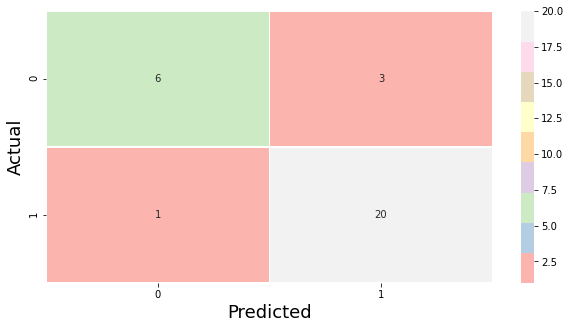

In [139]:
grid_search = GridSearchCV(SVC(), parameter)
grid_search.fit(X_train, y_train)
predicted_norm = grid_search.predict(X_test)
confusion_matrix_ = confusion_matrix(y_test, predicted_norm)
fig = plt.figure(figsize=(10, 5))
sns.heatmap(confusion_matrix_, annot=True, cmap="Pastel1", linewidths=0.5, linecolor="white");
plt.xlabel("Predicted", fontsize=18);
plt.ylabel("Actual", fontsize=18);
print(">> Score:")
print("--"*20)
print(f"   Accuracy = {accuracy_score(y_test, predicted_norm)}")
print(f"   F1 Score = {f1_score(y_test, predicted_norm)}")
print(f"   Precision = {precision_score(y_test, predicted_norm)}")
print(f"   Recall = {recall_score(y_test, predicted_norm)}")
print("--"*20)